In [36]:
using Plots

@inline function phi_normal(x::Float64,Nphi::Int64)
  #this function is for scalar x
  center = 0
  sigma = 1
  centers = center + collect(0:Nphi-1)*0.5*sigma
  phi = 1/sqrt(2*pi*sigma^2)*exp.(-(x-centers).^2/(2*sigma^2))

  return phi


end


Nphi = 16

phi_func(x) = phi_normal(x,Nphi)

function slater_det_evaluate(phi_func,x)
  Nphi = length(x)
  phi_val_mat = zeros(Nphi,Nphi)
  # Evaluate the value of the orbitals  phi_j(x_i)
  @inbounds for i = 1 : Nphi
    phi_val_mat[:,i] = phi_func(x[i])
  end

  return det(phi_val_mat)
end


function H_evaluate(phi_func,x)
  slater = slater_det_evaluate(phi_func,x)
  return -log.(abs.(slater).^2)
end

x1 = linspace(0,1,101)
x2 = linspace(0,1,101)


0.0:0.01:1.0

In [37]:
xraw = readdlm("data/x_normalNO_16.dat")
xtail = xraw[1,3:16]
x=[0;1]
#x=convert(Array{Float64,1}, x)
input = vcat(x,xtail)

16-element Array{Float64,1}:
  0.0     
  1.0     
  8.21689 
 -2.73001 
  6.11866 
  9.44823 
  2.36391 
  7.46278 
  4.35277 
  7.01562 
  5.54361 
 -0.370041
 -1.40548 
  1.18634 
  3.7127  
  3.44821 

In [38]:
f(x,y) = H_evaluate(phi_func,vcat([x;y],xtail))
f(0,1)

136.19243795356508

In [39]:
f(0.5,0.5)

Inf

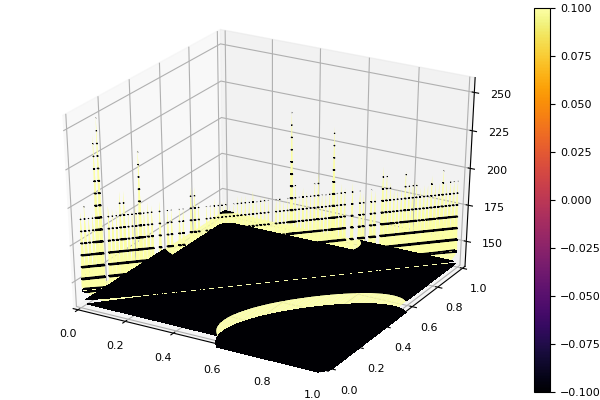

In [52]:
p = plot(x1, x2, f, st = [:surface, :contourf])

In [55]:
phi_normal(0.5,4)

4-element Array{Float64,1}:
 0.352065
 0.398942
 0.352065
 0.241971

In [57]:
phi_func(1.0)

16-element Array{Float64,1}:
 0.241971   
 0.352065   
 0.398942   
 0.352065   
 0.241971   
 0.129518   
 0.053991   
 0.0175283  
 0.00443185 
 0.000872683
 0.00013383 
 1.59837e-5 
 1.48672e-6 
 1.07698e-7 
 6.07588e-9 
 2.66956e-10

In [59]:
H_evaluate(phi_func, xraw[1,:])

132.5596005317981